<a href="https://colab.research.google.com/github/Wiwatdaka/FinalYearProject/blob/master/knn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/onehr.data',sep=',',header=None,date_parser=True)

In [0]:
df.shape

(2536, 74)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
df.replace('?', np.nan, inplace=True)

In [0]:
df.dropna(inplace=True,axis=0)
df.shape

(1848, 74)

In [0]:
y=df[73]

In [0]:
df1=df.drop(df[[0, 73]],axis=1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08
6,3.7,3.2,3.8,5.1,6,7,6.3,6.4,6.3,5.4,6.1,6.4,6.1,5.8,6.2,6.2,5.5,4.8,5.5,6.1,5,3.1,2.2,1.6,7,5.2,15.6,15.6,15.5,15.8,14.7,12,10.4,9,8.1,8.4,8.8,8.8,8.7,8.6,8.3,8.2,7.8,7.7,7.4,7.3,7.3,7.1,6.6,5.7,15.8,9.7,12.6,0.98,0.48,7.46,1413,4.6,0.53,13.36,15.34,3027.5,-11.8,0.84,6.86,25.6,5695,26.75,48.45,10040,-80,0.18


In [0]:
df1.shape

(1848, 72)

In [0]:
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scaler.transform(df1)

In [0]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,-0.661879,0.184751,0.708336,0.485510,0.408454,0.489235,-0.116060,-0.293347,-0.534478,-0.450034,0.556372,1.792138,1.449846,1.597422,1.560971,1.067727,0.861487,0.449388,0.738602,0.486167,0.894625,1.015471,0.790708,0.688908,1.127854,0.852405,-2.030610,-1.833014,-1.776162,-1.726068,-1.684009,-1.721252,-1.747198,-1.756434,-1.704906,-1.473087,-1.129509,-0.895880,-0.837814,-0.821175,-0.837282,-0.873243,-0.918777,-0.956462,-0.877124,-0.843492,-0.838010,-0.825801,-0.760361,-0.657164,-0.990500,-1.284015,-1.474198,-1.830390,0.410146,-0.296239,2.218066,-2.204647,-0.377450,0.318729,-0.141673,0.645982,-1.314655,-0.614268,0.091414,-0.300351,-0.362816,-1.129865,-1.798160,3.161799,-1.587013,-0.284165
1,0.934821,1.311018,1.447144,0.987922,1.503743,1.439016,1.115064,0.659843,0.489326,0.460788,0.943866,1.066535,1.024051,0.828517,1.631448,1.359313,0.468917,0.044794,0.014113,0.567473,0.076945,0.281823,0.549965,0.845116,1.127854,1.178813,-0.572341,-0.490905,-0.402777,-0.364038,-0.288261,-0.224576,-0.237229,-0.338413,-0.467606,-0.508025,-0.464758,-0.430405,-0.437781,-0.416760,-0.372281,-0.418164,-0.560872,-0.697243,-0.687361,-0.678938,-0.671761,-0.644258,-0.579701,-0.478015,-0.509227,-0.498506,-0.991055,-1.280693,-0.528969,1.245932,1.722371,-2.178328,2.143736,0.486344,1.000093,0.506592,-1.051781,0.735563,-0.152691,0.434538,-0.230688,0.167264,-0.789342,2.105007,-1.587013,-0.284165
2,1.014656,0.989227,0.872515,0.485510,0.576960,0.834610,0.763314,0.573189,-0.278527,-0.284430,0.091380,0.703733,0.953085,1.038218,1.701924,1.578002,1.568113,1.177656,0.738602,0.323554,0.649321,1.586086,1.833926,2.250995,1.213079,1.287615,-0.351391,-0.286671,-0.243753,-0.191992,-0.160080,-0.139859,-0.141140,-0.246504,-0.401792,-0.534833,-0.505457,-0.334572,-0.355015,-0.388870,-0.414554,-0.403943,-0.489291,-0.596436,-0.614375,-0.559263,-0.445057,-0.326558,-0.233435,-0.149574,-0.538395,-0.365118,-0.991055,-0.063507,-0.241033,1.351043,0.985910,-1.362438,0.539345,-0.215740,0.542115,0.249258,-1.419805,1.226411,-0.307934,1.245638,-0.428880,0.358237,0.328537,1.336431,-1.147401,-0.284165
3,2.451685,1.793704,1.775503,1.909009,1.166731,1.352673,1.027126,0.399882,-0.107893,0.212382,0.246377,0.050690,-0.537198,-0.709293,-0.694278,0.411660,-0.316223,-0.440718,-0.549378,0.730086,1.630536,1.586086,2.154916,2.016682,0.446050,0.961208,-0.100982,-0.067849,-0.012446,0.037402,0.096282,0.114294,0.078492,-0.010167,-0.204351,-0.373989,-0.519023,-0.649452,-0.699872,-0.751449,-0.766827,-0.830579,-0.832880,-0.740446,-0.614375,-0.484465,-0.399716,-0.281172,-0.158159,-0.074928,-0.917580,-0.365118,-0.801999,1.232208,-0.513464,1.089908,0.362751,-0.809738,1.417940,-0.157233,1.128900,-0.061688,-1.656392,0.776467,-0.116290,1.346345,-0.627072,1.015482,1.273735,0.567854,-1.147401,1.364121
4,1.653336,1.311018,1.857593,2.997567,3.778573,4.720081,4.104937,3.779373,3.219469,2.116828,2.416341,2.445181,2.159504,1.877023,2.124783,2.161174,1.803655,1.501331,2.348577,3.087973,2.366448,0.933955,0.309222,-0.092136,2.406236,3.137260,-0.498691,-0.447141,-0.417234,-0.335364,-0.459169,-0.817599,-1.033394,-1.283760,-1.586441,-1.767967,-1.902791,-2.045878,-2.162063,-2.257545,-2.359102,-2.394913,-2.421977,-2.338964,-2.249254,-2.159922,-2.062209,-2.005831,-1.994874,-2.045573,-1.471774,-1.699001,-0.234831,1.585584,-0.331843,0.905965,-3.418693,-0.388633,0.501145,1.295954,2.278617,-2.592143,-0.342021,2.208106,-0.316499,3.395868,-1.684098,0.797227,0.978360,-2.410379,-2.319701,-0.141525


In [0]:
train_pct_index = int(0.9 * len(scaled_features))
X_train, X_test = scaled_features[:train_pct_index], scaled_features[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [0]:
X_train.shape, X_test.shape

((1663, 72), (185, 72))

In [0]:
y_train.shape, y_test.shape

((1663,), (185,))

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

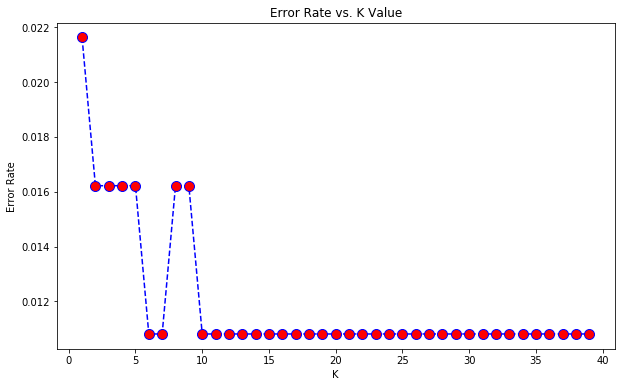

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [0]:
print('k=20')
print('\nTest accuracy:',(accuracy_score(y_test, pred)))

k=20

Test accuracy: 0.9891891891891892


In [0]:
+